# Project: Kickstarter: Understanding the variables of successful campaign


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Extracting Data

In [2]:
kick = pd.read_csv("kickstarter_data_full.csv")
kick.head(1)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (29,30,31,32) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,id,photo,name,blurb,goal,pledged,state,slug,disable_communication,...,launch_to_deadline,launch_to_state_change,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,SuccessfulBool,USorGB,TOPCOUNTRY,LaunchedTuesday,DeadlineWeekend
0,0,1454391034,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Auntie Di's Music Time Sign ASL for Hearing an...,MTS ASL Curriculum Workbook is a reproducible ...,1500.0,0.0,failed,auntie-dis-music-time-sign-asl-for-hearing-and...,False,...,36 days 20:47:24.000000000,36 days 20:47:24.000000000,17,36,36,0,1,1,0,0


In [3]:
kick.columns

Index(['Unnamed: 0', 'id', 'photo', 'name', 'blurb', 'goal', 'pledged',
       'state', 'slug', 'disable_communication', 'country', 'currency',
       'currency_symbol', 'currency_trailing_code', 'deadline',
       'state_changed_at', 'created_at', 'launched_at', 'staff_pick',
       'backers_count', 'static_usd_rate', 'usd_pledged', 'creator',
       'location', 'category', 'profile', 'spotlight', 'urls', 'source_url',
       'friends', 'is_starred', 'is_backing', 'permissions', 'name_len',
       'name_len_clean', 'blurb_len', 'blurb_len_clean', 'deadline_weekday',
       'state_changed_at_weekday', 'created_at_weekday', 'launched_at_weekday',
       'deadline_month', 'deadline_day', 'deadline_yr', 'deadline_hr',
       'state_changed_at_month', 'state_changed_at_day', 'state_changed_at_yr',
       'state_changed_at_hr', 'created_at_month', 'created_at_day',
       'created_at_yr', 'created_at_hr', 'launched_at_month',
       'launched_at_day', 'launched_at_yr', 'launched_at_hr',
   

# Data description

In [4]:
kick.shape

(20632, 68)

In [5]:
kick.dtypes

Unnamed: 0          int64
id                  int64
photo              object
name               object
blurb              object
                    ...  
SuccessfulBool      int64
USorGB              int64
TOPCOUNTRY          int64
LaunchedTuesday     int64
DeadlineWeekend     int64
Length: 68, dtype: object

In [6]:
kick.isnull().any()

Unnamed: 0         False
id                 False
photo              False
name               False
blurb               True
                   ...  
SuccessfulBool     False
USorGB             False
TOPCOUNTRY         False
LaunchedTuesday    False
DeadlineWeekend    False
Length: 68, dtype: bool

# Plotting Data - Descriptive analysis

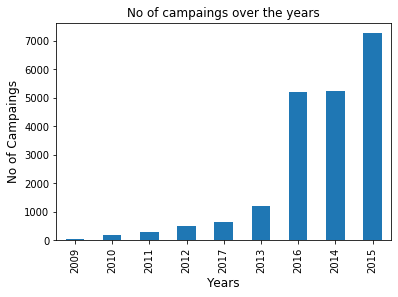

<Figure size 432x288 with 0 Axes>

In [7]:
kick['launched_at_yr'].value_counts().sort_values().plot(kind='bar')
plt.title("No of campaings over the years")
plt.ylabel('No of Campaings', fontsize=12)
plt.xlabel('Years', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()
plt.savefig('Figure1_No of campaings over the years_bar.png')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  after removing the cwd from sys.path.


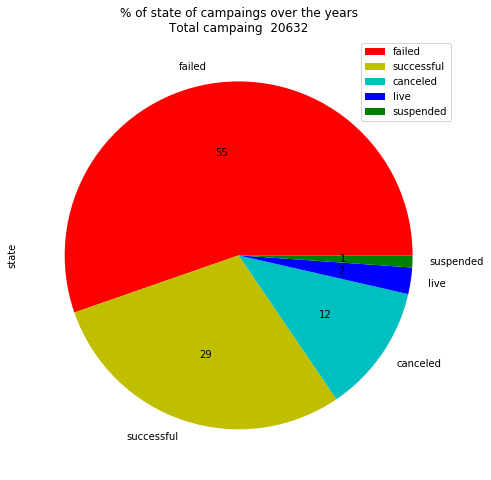

In [8]:
kick['state'].value_counts().plot(kind='pie',autopct='%.0f', fontsize=10, colors=['r', 'y', 'c', 'b', 'g'], figsize=(8, 8))
plt.title("% of state of campaings over the years\nTotal campaing  20632")
plt.legend(['failed', 'suspended', 'live', 'canceled', 'successful'])
plt.legend(loc="bottom right")
plt.savefig('Figure2_state of campaings.png')

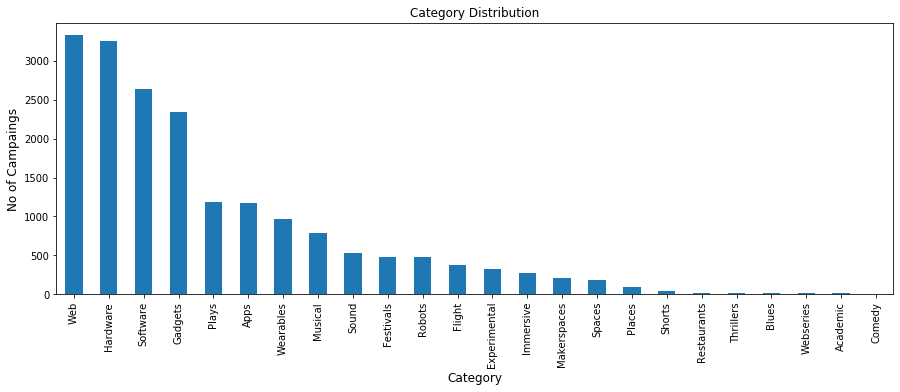

<Figure size 432x288 with 0 Axes>

In [10]:
kick['category'].value_counts().plot(kind = 'bar', figsize=(15,5))
plt.title('Category Distribution')
plt.ylabel('No of Campaings', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()
plt.savefig('Figure3_No of campaings as per category_bar.png')

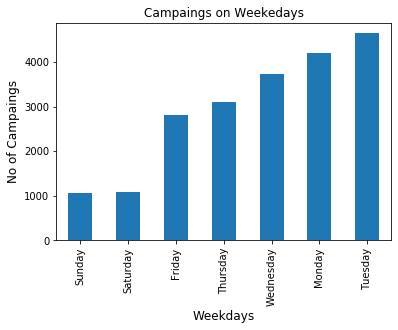

<Figure size 432x288 with 0 Axes>

In [11]:
kick['launched_at_weekday'].value_counts().sort_values().plot(kind='bar')
plt.title("Campaings on Weekedays")
plt.ylabel('No of Campaings', fontsize=12)
plt.xlabel('Weekdays', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()
plt.savefig('Figure3_Campaings on Weekedays_bar.png')

# Finding relationship - Diagnostic analysis

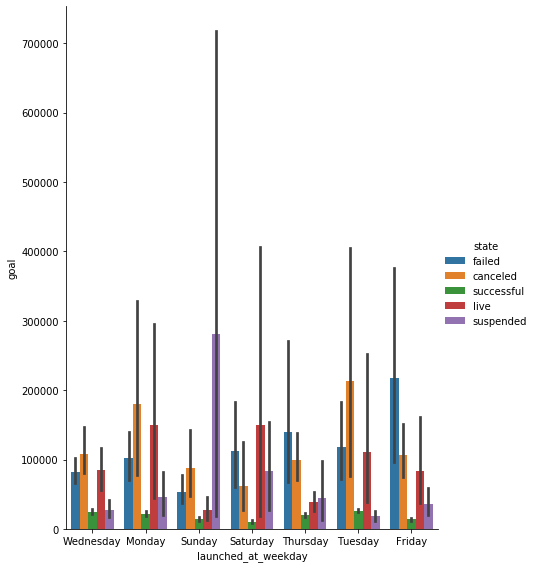

In [12]:
import seaborn as sns
g = sns.catplot(x="launched_at_weekday", y="goal",
                hue="state",
                data=kick, kind="bar",
                height=8, aspect=.8);

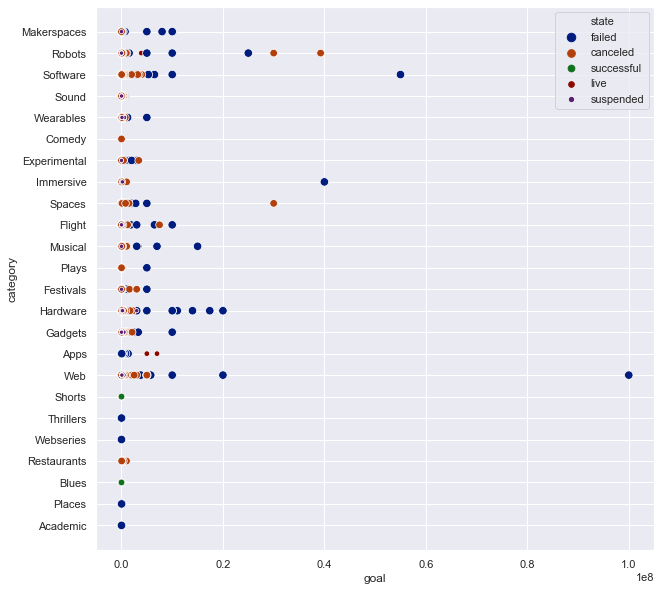

In [13]:
import seaborn as sns
sns.set(style="darkgrid",font='sans-serif',palette='dark')
plt.figure(figsize=(10,10))

sns.scatterplot( x="goal", y="category",
                hue="state", 
                data=kick, size="state")

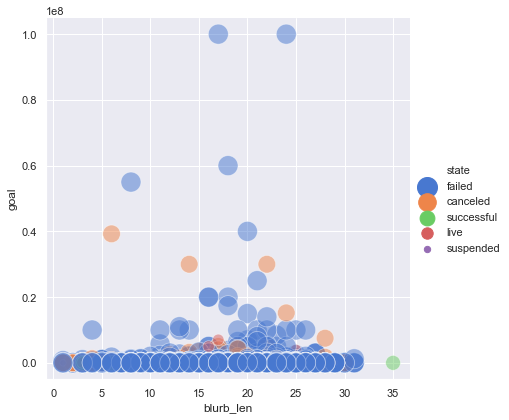

In [14]:
sns.relplot(x="blurb_len", y="goal", hue="state", size="state",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=kick)

This heat map shows the relationship of one data point to the other datapoints. The lighter the color the more correlate the data with each other.

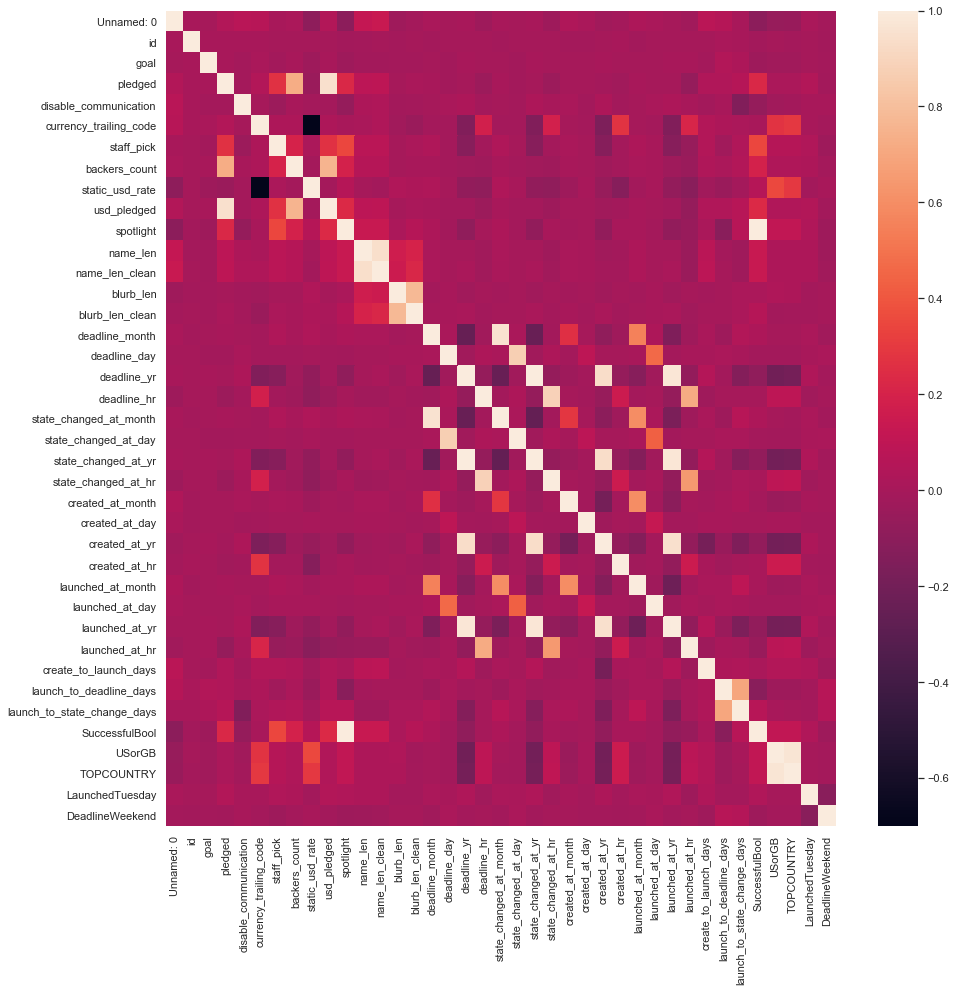

In [15]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(kick.corr());
#plt.savefig('figure8_Corr Heat Map.png')